In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import random as rn
%matplotlib inline

In [2]:
stuff = pd.read_csv('../CSV/smirnov.csv')
x = stuff['Data'].sort_values()
temptable = pd.DataFrame(x)
temptable = temptable.set_index(np.arange(0,len(x),1))

x

44    12.466940
32    12.977500
11    13.062366
6     14.189048
21    14.373638
55    15.084535
46    16.089481
45    16.939131
48    17.177949
57    17.345248
50    18.187142
63    18.226079
62    18.509478
28    20.104138
49    20.304243
37    20.638315
8     20.879328
61    21.032815
68    21.447207
35    22.199174
7     24.470814
4     24.788575
1     24.838406
64    25.035233
16    25.248455
51    26.703245
3     27.255098
17    28.068419
43    30.595818
40    31.672577
        ...    
24    35.597964
18    36.262546
14    37.287182
5     37.377929
9     38.314862
20    38.555315
53    39.913359
56    39.941830
52    40.801182
2     41.702672
39    41.845712
54    41.965497
12    42.233940
15    42.276798
41    42.390992
27    43.242796
30    43.454974
13    43.853637
10    44.093345
65    44.672582
33    45.173203
66    45.480666
59    46.830791
58    47.443418
42    48.281985
34    48.433732
29    48.865425
19    48.953795
47    49.437039
31    49.657190
Name: Data, dtype: float

In [3]:
def get_empirical_and_index(array):
    x = {}
    for datapoint in array:
        x[datapoint] = 0
        
    for datapoint in array:
        x[datapoint] += 1
    
    F = np.zeros(len(x)+1)
    i = 1
    length = len(array)
    for value in x:
        F[i] = F[i-1] + x[value]/length
        i += 1
    
    return F, list(x.keys())

a1 = get_empirical_and_index(temptable['Data'])
empF_left = pd.Series(a1[0][:-1])
empF = pd.Series(a1[0][1:])
uniqueValues = pd.Series(a1[1])
length = len(uniqueValues)

In [4]:
table = pd.DataFrame({'Data' : uniqueValues, 'Empir. F(x-)' : empF_left, 'Empir. F(x)' : empF})
table.head()

,Data,Empir. F(x),Empir. F(x-)
0,12.466940,0.014493,0.000000
1,12.977500,0.028986,0.014493
2,13.062366,0.043478,0.028986
3,14.189048,0.057971,0.043478
4,14.373638,0.072464,0.057971


In [5]:
def testDistribution(x): #CDF
    fx = (x-10)/40
    return fx

def get_test_distribution_values(): #String value for distr, use capital X for the data value
    F = np.zeros(length)
    i = 0
    for value in uniqueValues:
        F[i] = testDistribution(value)
        i += 1
        
    return F

F = pd.DataFrame({'F(x)' : get_test_distribution_values()})
table = pd.DataFrame.merge(table, F, how='left', left_index = True, right_index = True)

max_diff = []
for i in range(len(table['Empir. F(x)'])):
    max_diff.append(max(abs(table['Empir. F(x)'][i] - table['F(x)'][i]), abs(table['Empir. F(x-)'][i] - table['F(x)'][i])))
    
table['Max Diff.'] = pd.Series(max_diff)
    
test_statistic = max(table['Max Diff.'])

In [6]:
# The test_statistic is the maximum of the maximum differences 
# (between the distribution and the empirical) along each data point

test_statistic

0.14289679580434778

In [7]:
table.head()

,Data,Empir. F(x),Empir. F(x-),F(x),Max Diff.
0,12.466940,0.014493,0.000000,0.061673,0.061673
1,12.977500,0.028986,0.014493,0.074437,0.059945
2,13.062366,0.043478,0.028986,0.076559,0.047574
3,14.189048,0.057971,0.043478,0.104726,0.061248
4,14.373638,0.072464,0.057971,0.109341,0.051370


The chi-squared test statistic is:  3.3119392684610105


<Container object of 6 artists>

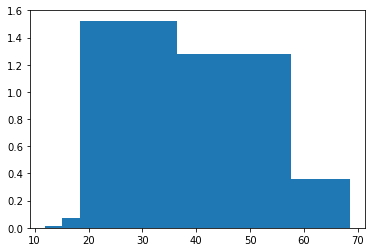

In [35]:
def testDistribution(x): #CDF
    fx = (x-10)/40
    return fx


# Choose arbitrary values, preferably ones which cause the 
# chi-squared term (chi_s) per group to be as invariant as possible 
chi_r = np.array([12,18,25,30,37,45,52])
groups = len(chi_r)-1
chi_s = np.zeros(groups)
num_datapt = len(table['Data'])

for i in range(groups):
    observed = len(table[table['Data']>=chi_r[i]]['Data'])-len(table[table['Data']>chi_r[i+1]]['Data'])
    expected = (testDistribution(chi_r[i+1])-testDistribution(chi_r[i]))*num_datapt
    chi_s[i] = (1/expected)*(observed-expected)**2

print('The chi-squared test statistic is: ', np.sum(chi_s))
X = (chi_r[1:]+chi_r[:groups])/2
Y = chi_s
widths = np.delete((chi_r-chi_r[0]),0)

plt.bar(X,Y,widths)

# There is too much variance with the range values, 
# this test will not be as definitive with the group ranges as defined.